In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [6]:
df = pd.read_csv("credit_data.csv")
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
"""
Classification model
target column = Loan Status (1: Charged Off/ 0: Fully Paid)
remove columns: Loan ID ; Customer ID
"""

'\nClassification model\ntarget column = Loan Status (1: Charged Off/ 0: Fully Paid)\nremove columns: Loan ID ; Customer ID\n'

In [8]:
df.shape

(100514, 19)

In [9]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

<AxesSubplot:>

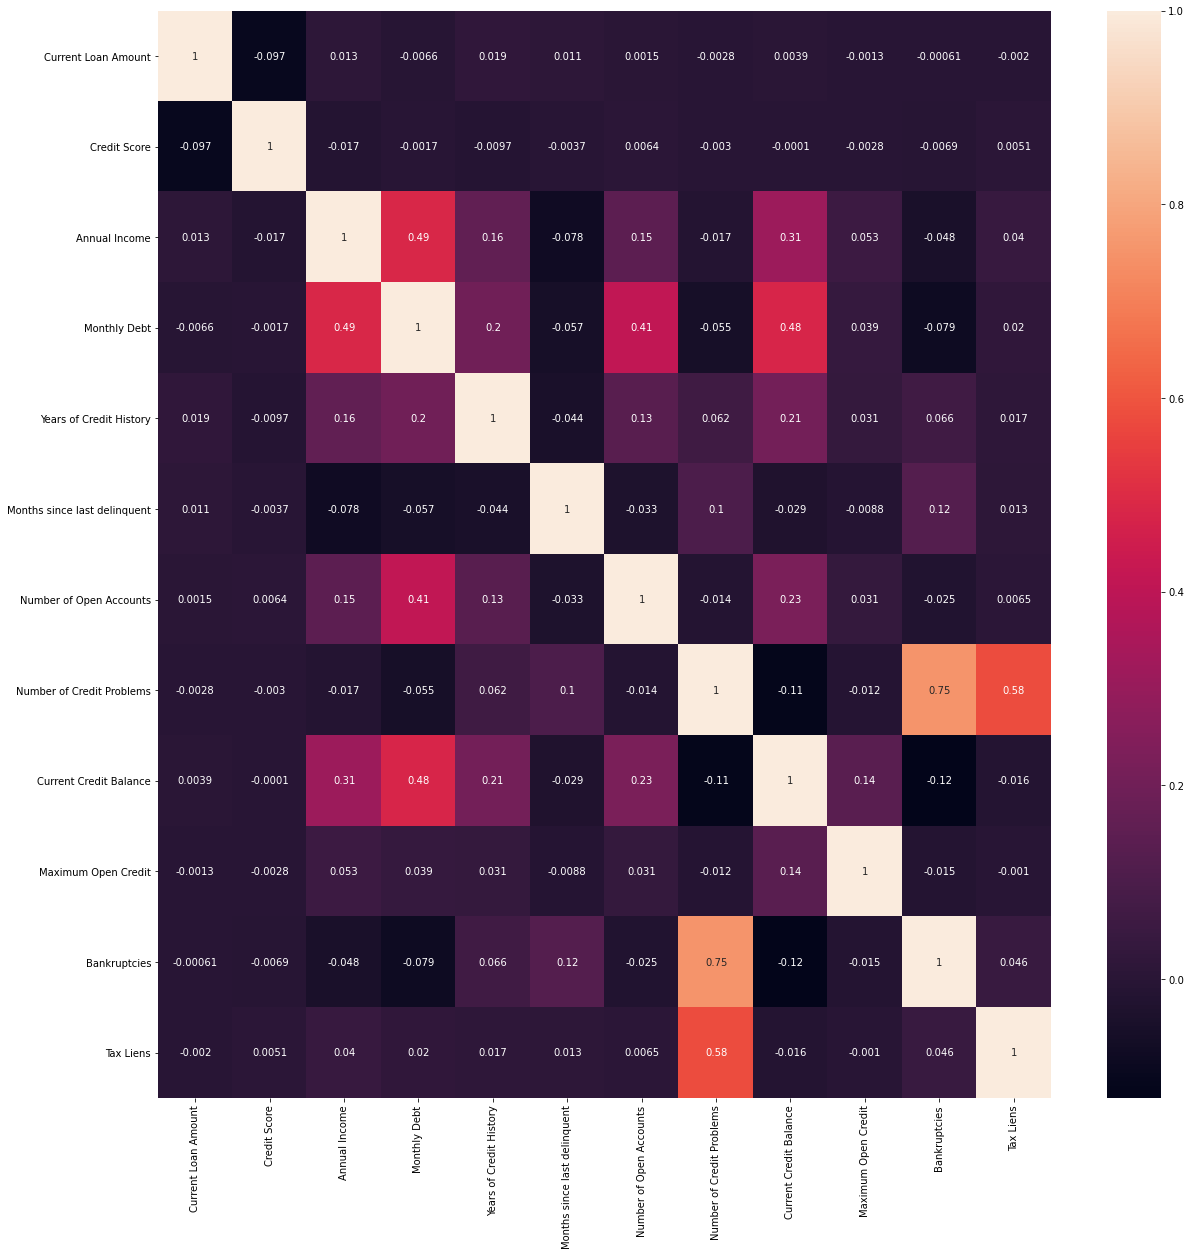

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),  annot = True)

In [12]:
"""
because Loan ID must be unique, we drop the duplicated entry here
"""
df = df[~df["Loan ID"].duplicated()]
df = df[~df["Loan ID"].isnull()]
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [13]:
df.shape

(81999, 19)

In [14]:
"""
Credit Score 
use median to replace NA
"""
df["Credit Score"] = df["Credit Score"].fillna(df["Credit Score"].median())

In [15]:
"""
Annual Income
use median to replace NA
"""
df["Annual Income"] = df["Annual Income"].fillna(df["Annual Income"].median())

In [16]:
"""
Years in current job
replace the object type year with numeric
"""

year_dict = {'< 1 year': 0, 
            '1 year': 1,
            '2 years': 2,
            '3 years': 3,
            '4 years': 4,
            '5 years': 5,
            '6 years': 6,
            '7 years': 7,
            '8 years': 8,
            '9 years': 9,
            '10+ years':10}

df["Years in current job"] = df["Years in current job"].replace(year_dict)

In [17]:
df["Years in current job"] = df["Years in current job"].fillna(df["Years in current job"].median())

In [18]:
"""
Purpose
combined duplicated categories together
"""

df["Purpose"] = df["Purpose"].replace("other", "Other")

In [19]:
"""
Months since last delinquent
too many NA, this column to be removed
"""

df = df.drop(columns=["Months since last delinquent"])

In [20]:
"""
Maximum Open Credit
use median to replace NA
"""
df["Maximum Open Credit"] = df["Maximum Open Credit"].fillna(df["Maximum Open Credit"].median())

In [21]:
"""
Bankruptcies
"""
df["Bankruptcies"] = df["Bankruptcies"].fillna(float(df["Bankruptcies"].mode()))

In [22]:
"""
Tax Liens
"""
df["Tax Liens"] = df["Tax Liens"].fillna(float(df["Tax Liens"].mode()))

<AxesSubplot:>

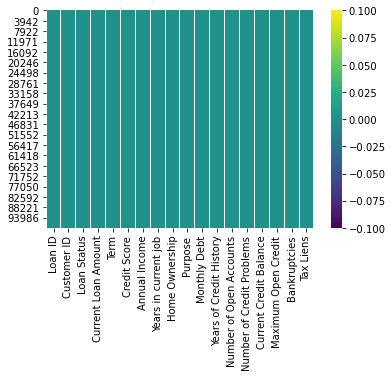

In [23]:
sns.heatmap(df.isnull(), cmap="viridis")

In [24]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [25]:
df.shape

(81999, 18)

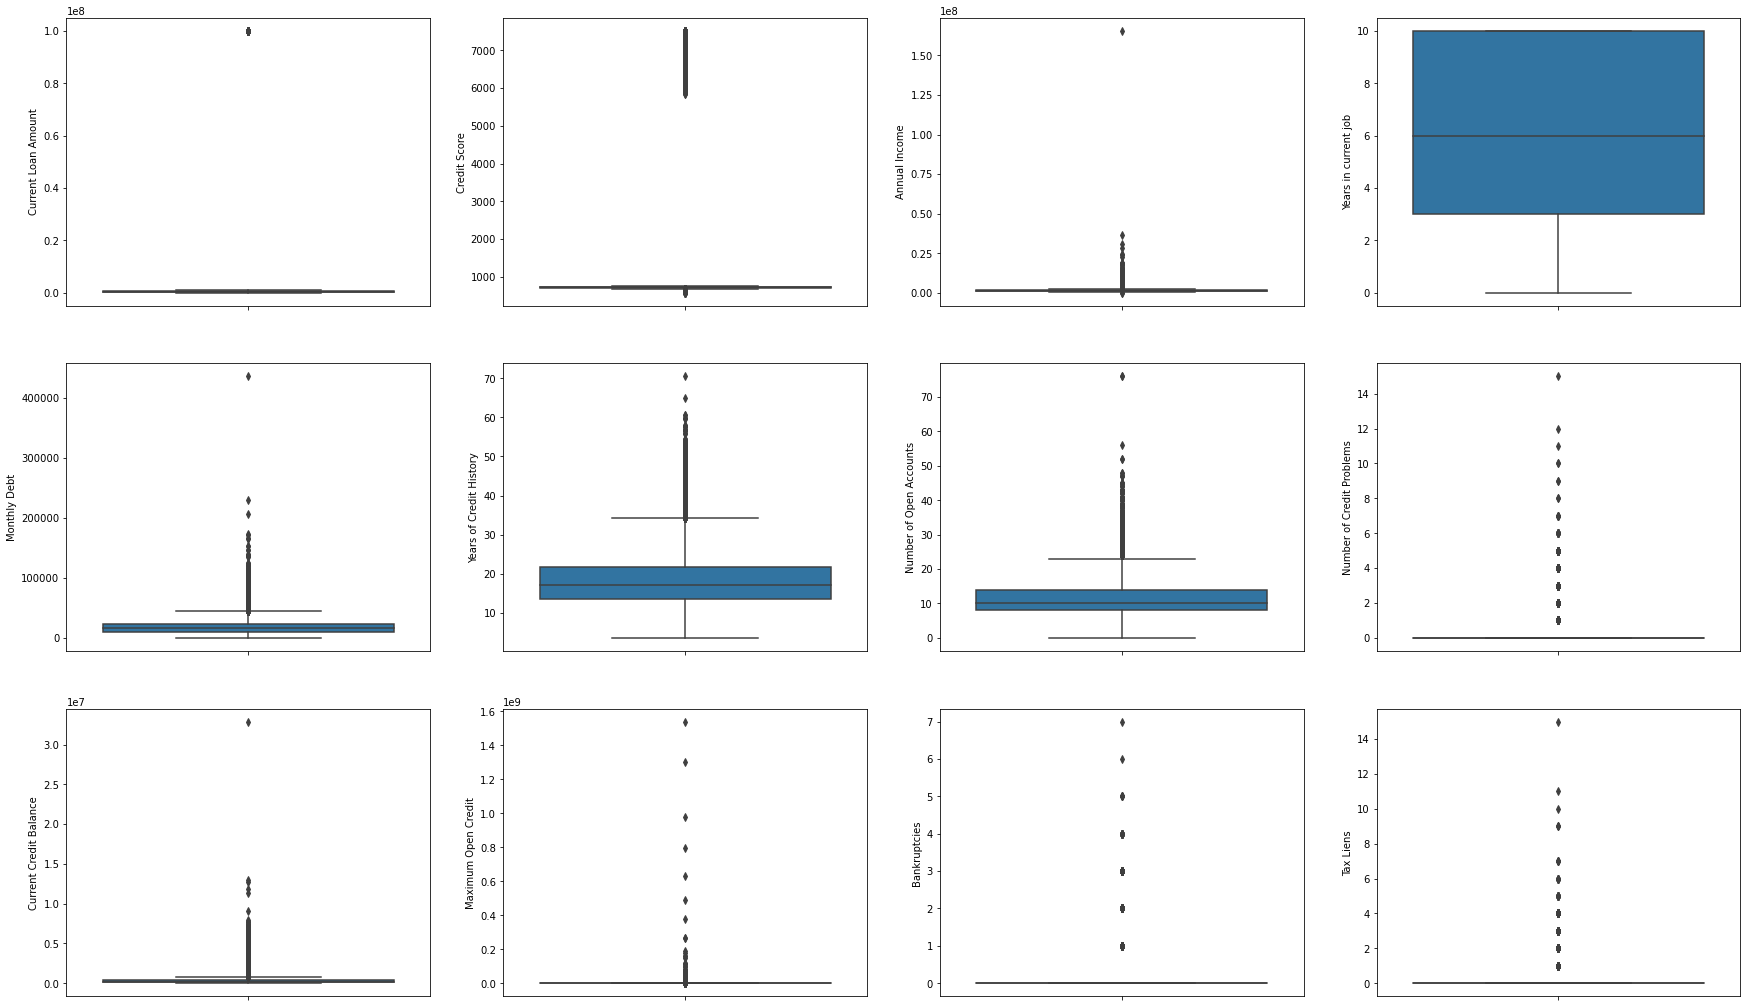

In [26]:
fig, ax = plt.subplots(3,4, figsize=(30,18))
index = 0
ax = ax.flatten() # convert n*m ax into 1*nm ax
for c in [i for i in df if df[i].dtype!=object]:
    if df[c].dtype != object:
        sns.boxplot(y=c, data=df, ax=ax[index])
    index += 1

plt.show()

In [27]:
df = df.drop(columns=["Loan ID", "Customer ID"])
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,731.0,1169592.5,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,731.0,1169592.5,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [28]:
"""
because of the number of rows changed, we have to reset the index of the dataframe
"""
df = df.reset_index(drop=True)
print(df.index)

RangeIndex(start=0, stop=81999, step=1)


In [29]:
"""
Loan Status is the target
"""
df["Loan Status"].value_counts()

Fully Paid     59360
Charged Off    22639
Name: Loan Status, dtype: int64

In [30]:
"""
in order to specify the 1 & 0 to the target columns, I use replace function here instead of LabelEncoder, which randomly assign the 1 & 0
"""
status_dict = {"Fully Paid": 0,
              "Charged Off": 1}

df["Loan Status"] = df["Loan Status"].replace(status_dict)
df["Loan Status"].value_counts()

0    59360
1    22639
Name: Loan Status, dtype: int64

In [31]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,0,262328.0,Short Term,731.0,1169592.5,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0,176220.0,Short Term,731.0,1169592.5,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [32]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(X.shape)
print(y.shape)

(81999, 15)
(81999,)


In [33]:
X.dtypes

Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job         float64
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [34]:
"""
pipeline for encoding and scaling
"""

numeric_features = list(X.select_dtypes(include=["int64","float64"]).columns)
numeric_transformer = Pipeline(steps = [
    ("scaler", MinMaxScaler())
])

categorical_features = list(X.select_dtypes(include=["object"]).columns)
categorical_transformer = Pipeline(steps= [
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

preprocess_pipe = Pipeline(steps= [
    ("preprocessor", preprocessor),
])

In [35]:
transformed_X = preprocess_pipe.fit_transform(X)
df_X = pd.DataFrame(transformed_X)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.004347,0.017906,0.006592,0.8,0.011965,0.203288,0.078947,0.066667,0.006940,0.000271,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002516,0.021083,0.006605,1.0,0.076394,0.261584,0.460526,0.000000,0.006995,0.000553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.022527,0.013024,0.8,0.066998,0.168909,0.236842,0.066667,0.009063,0.000487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003369,0.019639,0.004413,0.3,0.020057,0.125561,0.118421,0.000000,0.007796,0.000251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001654,0.021083,0.006605,0.5,0.047356,0.037369,0.197368,0.000000,0.007709,0.000277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
columns_names = []
onehot_features_names = preprocess_pipe["preprocessor"].transformers_[1][1]['onehot'].get_feature_names(categorical_features)
columns_names = numeric_features + list(onehot_features_names)
print(columns_names)

['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years in current job', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term_Long Term', 'Term_Short Term', 'Home Ownership_HaveMortgage', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Debt Consolidation', 'Purpose_Educational Expenses', 'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving', 'Purpose_renewable_energy', 'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding']


In [41]:
df_X.columns = columns_names
df_X.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0.004347,0.017906,0.006592,0.8,0.011965,0.203288,0.078947,0.066667,0.006940,0.000271,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002516,0.021083,0.006605,1.0,0.076394,0.261584,0.460526,0.000000,0.006995,0.000553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.022527,0.013024,0.8,0.066998,0.168909,0.236842,0.066667,0.009063,0.000487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003369,0.019639,0.004413,0.3,0.020057,0.125561,0.118421,0.000000,0.007796,0.000251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001654,0.021083,0.006605,0.5,0.047356,0.037369,0.197368,0.000000,0.007709,0.000277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
 X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=42, stratify=df["Loan Status"])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(65599, 33)
(65599,)
(16400, 33)
(16400,)


In [49]:
model_performances = {}

In [50]:
"""
model testing: Logistic Regression
"""

log_pipe = Pipeline(steps= [
    ("pca", PCA()),
    ("logistic", LogisticRegression())
])

param_grid = {
    'pca__n_components': [10,15,25,33],
    'logistic__penalty': 'saga',
    'logistic__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logistic__C': [1.0, 0.1, 0.01]
}

search = RandomizedSearchCV(estimator=log_pipe, param_distributions=param_grid, cv=3, n_jobs=-1, scoring="neg_log_loss")
search.fit(X_train, y_train)
model_performances["logreg"] = {"neg_log_loss_score": search.best_score_,
                               "best_estimator": search.best_estimator_,
                               "best_params": search.get_params}
print(search.best_score_)
print(search.best_estimator_)
print(search.get_params)

-0.46733508271099417
Pipeline(steps=[('pca', PCA(n_components=10)),
                ('logistic', LogisticRegression(C=0.01, penalty='none'))])
<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('logistic',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': [1.0, 0.1, 0.01],
                                        'logistic__penalty': ['l1', 'l2',
                                                              'elasticnet',
                                                              'none'],
                                        'pca__n_components': [10, 15, 25, 33]},
                   scoring='neg_log_loss')>


In [51]:
"""
model testing: KNeighbors Classifier
"""

knn_pipe = Pipeline(steps= [
    ("pca", PCA()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    'pca__n_components': [10,15,25,33],
    'knn__n_neighbors': np.arange(1, 12, 2),
    'knn__weights': ['uniform','distance']
}

search = RandomizedSearchCV(estimator=knn_pipe, param_distributions=param_grid, cv=3, n_jobs=-1, scoring="neg_log_loss")
search.fit(X_train, y_train)
model_performances["knn"] = {"neg_log_loss_score": search.best_score_,
                               "best_estimator": search.best_estimator_,
                               "best_params": search.get_params}
print(search.best_score_)
print(search.best_estimator_)
print(search.get_params)

-0.781464443320408
Pipeline(steps=[('pca', PCA(n_components=15)),
                ('knn', KNeighborsClassifier(n_neighbors=11))])
<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('knn', KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11]),
                                        'knn__weights': ['uniform', 'distance'],
                                        'pca__n_components': [10, 15, 25, 33]},
                   scoring='neg_log_loss')>


In [52]:
"""
model testing: DecisionTree Classifier
"""

tree_pipe = Pipeline(steps= [
    ("pca", PCA()),
    ("tree", DecisionTreeClassifier())
])

param_grid = {
    'pca__n_components': [10,15,25,33],
    "tree__criterion": ["gini", "entropy"],
    "tree__min_samples_split": [10, 20, 40],
    "tree__max_depth": [2, 6, 8],
    "tree__min_samples_leaf": [20, 40, 100],
    "tree__max_leaf_nodes": [5, 20, 100],
}

search = RandomizedSearchCV(estimator=tree_pipe, param_distributions=param_grid, cv=3, n_jobs=-1, scoring="neg_log_loss")
search.fit(X_train, y_train)
model_performances["tree"] = {"neg_log_loss_score": search.best_score_,
                               "best_estimator": search.best_estimator_,
                               "best_params": search.get_params}
print(search.best_score_)
print(search.best_estimator_)
print(search.get_params)

-0.4641348401909075
Pipeline(steps=[('pca', PCA(n_components=33)),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        max_leaf_nodes=20, min_samples_leaf=100,
                                        min_samples_split=10))])
<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('tree',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [10, 15, 25, 33],
                                        'tree__criterion': ['gini', 'entropy'],
                                        'tree__max_depth': [2, 6, 8],
                                        'tree__max_leaf_nodes': [5, 20, 100],
                                        'tree__min_samples_leaf': [20, 40, 100],
             

In [53]:
"""
model testing: RandomForest Classifier
"""

rfc_pipe = Pipeline(steps= [
    ("pca", PCA()),
    ("rfc", RandomForestClassifier())
])

param_grid = {
    'pca__n_components': [10,15,25,33],
    "rfc__n_estimators" : [30,40,50],
    "rfc__max_features" : ["sqrt", "log2"],
    "rfc__min_samples_split" : [6,8,10,12,14]
}

search = RandomizedSearchCV(estimator=rfc_pipe, param_distributions=param_grid, cv=3, n_jobs=-1, scoring="neg_log_loss")
search.fit(X_train, y_train)
model_performances["rfc"] = {"neg_log_loss_score": search.best_score_,
                               "best_estimator": search.best_estimator_,
                               "best_params": search.get_params}
print(search.best_score_)
print(search.best_estimator_)
print(search.get_params)

-0.4760813397939061
Pipeline(steps=[('pca', PCA(n_components=33)),
                ('rfc',
                 RandomForestClassifier(max_features='sqrt',
                                        min_samples_split=8,
                                        n_estimators=50))])
<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [10, 15, 25, 33],
                                        'rfc__max_features': ['sqrt', 'log2'],
                                        'rfc__min_samples_split': [6, 8, 10, 12,
                                                                   14],
                                        'rfc__n_estimators': [30, 40, 50]},
                   scoring='neg_log_loss')>


In [54]:
"""
model testing: AdaBoost Classifier
"""

ada_pipe = Pipeline(steps= [
    ("pca", PCA()),
    ("ada", AdaBoostClassifier())
])

param_grid = {
    'pca__n_components': [10,15,25,33],
    'ada__n_estimators': [300, 400],
    'ada__learning_rate': [0.3, 0.4]
}

search = RandomizedSearchCV(estimator=ada_pipe, param_distributions=param_grid, cv=3, n_jobs=-1, scoring="neg_log_loss")
search.fit(X_train, y_train)
model_performances["ada"] = {"neg_log_loss_score": search.best_score_,
                               "best_estimator": search.best_estimator_,
                               "best_params": search.get_params}
print(search.best_score_)
print(search.best_estimator_)
print(search.get_params)

-0.6727090631963305
Pipeline(steps=[('pca', PCA(n_components=10)),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.3, n_estimators=300))])
<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('ada', AdaBoostClassifier())]),
                   n_jobs=-1,
                   param_distributions={'ada__learning_rate': [0.3, 0.4],
                                        'ada__n_estimators': [300, 400],
                                        'pca__n_components': [10, 15, 25, 33]},
                   scoring='neg_log_loss')>


In [55]:
"""
model testing: XGB Classifier
"""

xgb_pipe = Pipeline(steps= [
    ("pca", PCA()),
    ("xgb", XGBClassifier())
])

param_grid = {
    'pca__n_components': [10,15,25,33],
    'xgb__learning_rate': [0.001, 0.01, 0.1],
    'xgb__max_depth': [3,4]
}

search = RandomizedSearchCV(estimator=xgb_pipe, param_distributions=param_grid, cv=3, n_jobs=-1, scoring="neg_log_loss")
search.fit(X_train, y_train)
model_performances["xgb"] = {"neg_log_loss_score": search.best_score_,
                               "best_estimator": search.best_estimator_,
                               "best_params": search.get_params}
print(search.best_score_)
print(search.best_estimator_)
print(search.get_params)

[15:24:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-0.4590084617262302
Pipeline(steps=[('pca', PCA(n_components=33)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, random_state=0,
                               reg_

In [63]:
for i in model_performances:
    print(i)
    print(model_performances[i]["neg_log_loss_score"])

logreg
-0.46733508271099417
knn
-0.781464443320408
tree
-0.4641348401909075
rfc
-0.4760813397939061
ada
-0.6727090631963305
xgb
-0.4590084617262302


In [64]:
print("XGB model performs the best")

XGB model performs the best


In [71]:
print(model_performances['xgb']['best_estimator'])
# print(model_performances['xgb']['best_params'])

Pipeline(steps=[('pca', PCA(n_components=33)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])


In [76]:
"""
use the estimator with best parameters to test the test dataset
"""
xgb_test = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None)


xgb_test.fit(X_train, y_train)
y_pred_xgb = xgb_test.predict(X_test)

[15:38:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
print(classification_report(y_test,y_pred_xgb))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])
print('The roc_auc_score:', roc_auc_score(y_test, y_pred_xgb))
print('The accuracy_score:', accuracy_score(y_test, y_pred_xgb))
print(f"precision: {tp/(tp+fp)}")
print(f"recall: {tp/(tp+fn)}")

              precision    recall  f1-score   support

           0       0.77      0.99      0.87     11872
           1       0.94      0.22      0.36      4528

    accuracy                           0.78     16400
   macro avg       0.86      0.61      0.61     16400
weighted avg       0.82      0.78      0.73     16400

11811 61 3533 995
[995, 61]
[3533, 11811]
The roc_auc_score: 0.607302838046346
The accuracy_score: 0.7808536585365854
precision: 0.9422348484848485
recall: 0.21974381625441697


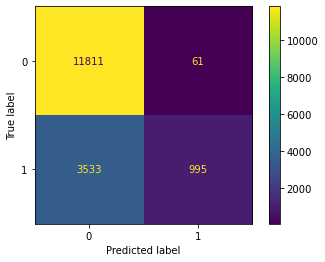

In [79]:
plot_confusion_matrix(xgb_test, X_test, y_test)

In [81]:
y_pred_prob_xgb = xgb_test.predict_proba(X_test)
y_pred_prob_xgb

array([[0.5834681 , 0.41653192],
       [0.7646354 , 0.23536463],
       [0.6868532 , 0.31314683],
       ...,
       [0.9970446 , 0.00295539],
       [0.762997  , 0.23700301],
       [0.7397363 , 0.26026368]], dtype=float32)

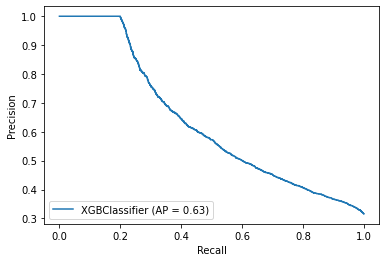

In [80]:
plot_precision_recall_curve(xgb_test, X_test, y_test)

In [92]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_xgb[:,1])

fig = px.area(
    x=recall, y=precision,
    title=f'Precision-Recall Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='Recall', y='Precision'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)
fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

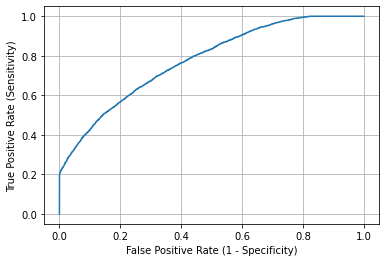

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb[:,1]) # y_pred should be changed to y_prob
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

In [85]:
fig = go.Figure()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb[:,1])

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [94]:
"""
To adjust the threshold, aim to get higher recall rate as our beginning objective
"""

for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    threshold_list = []
    for i in y_pred_prob_xgb[:,1]:
        if i > t:
            threshold_list.append(1)
        else:
            threshold_list.append(0)
    
    TN, FP, FN, TP = confusion_matrix(y_test,threshold_list).ravel()
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)

    false_positive_rate= FP/(FP+TN)
    true_positive_rate= TP/(TP+FN)
    print(f"threshold: {t}\nprecision: {round(precision, 4)}, recall: {round(recall, 4)}, false_positive_rate: {round(false_positive_rate, 4)}, true_positive_rate: {round(true_positive_rate, 4)}\n")

threshold: 0.1
precision: 0.3239, recall: 0.9923, false_positive_rate: 0.7901, true_positive_rate: 0.9923

threshold: 0.2
precision: 0.3645, recall: 0.9068, false_positive_rate: 0.6029, true_positive_rate: 0.9068

threshold: 0.3
precision: 0.5012, recall: 0.5989, false_positive_rate: 0.2273, true_positive_rate: 0.5989

threshold: 0.4
precision: 0.6924, recall: 0.35, false_positive_rate: 0.0593, true_positive_rate: 0.35

threshold: 0.5
precision: 0.9422, recall: 0.2197, false_positive_rate: 0.0051, true_positive_rate: 0.2197

threshold: 0.6
precision: 0.9978, recall: 0.2001, false_positive_rate: 0.0002, true_positive_rate: 0.2001

threshold: 0.7
precision: 1.0, recall: 0.1999, false_positive_rate: 0.0, true_positive_rate: 0.1999

threshold: 0.8
precision: 1.0, recall: 0.1996, false_positive_rate: 0.0, true_positive_rate: 0.1996

threshold: 0.9
precision: 1.0, recall: 0.1996, false_positive_rate: 0.0, true_positive_rate: 0.1996



In [95]:
"""
threshold: 0.2
precision: 0.3645, recall: 0.9068, false_positive_rate: 0.6029, true_positive_rate: 0.9068
because the high recall rate is what we aim to. thus, threshold at 0.2 may suit our object the most
the tradeoff is that reject rate in the application would increase, that may affect the revenue.
"""

'\nthreshold: 0.2\nprecision: 0.3645, recall: 0.9068, false_positive_rate: 0.6029, true_positive_rate: 0.9068\nbecause the high recall rate is what we aim to. thus, threshold at 0.2 may suit our object the most\nthe tradeoff is that reject rate in the application would increase, that may affect the revenue.\n'

In [97]:
xgb_test.classes_

array([0, 1], dtype=int64)

Precision: 0.3645
Recall: 0.9068
false_positive_rate: 0.6029
true_positive_rate: 0.9068


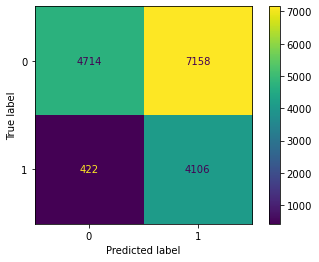

In [98]:
"""
Set threshold as 0.2
"""
from sklearn.metrics import ConfusionMatrixDisplay

t = 0.2
threshold_list = []
for i in y_pred_prob_xgb[:,1]:
    if i > t:
        threshold_list.append(1)
    else:
        threshold_list.append(0)

TN, FP, FN, TP = confusion_matrix(y_test,threshold_list).ravel()
precision=TP/(TP+FP)
recall=TP/(TP+FN)
false_positive_rate= FP/(FP+TN)
true_positive_rate= TP/(TP+FN)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"false_positive_rate: {false_positive_rate:.4f}")
print(f"true_positive_rate: {true_positive_rate:.4f}")

cm = confusion_matrix(y_test, threshold_list, labels=xgb_test.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xgb_test.classes_)
disp.plot() 